In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib



> **Loading the dataset**




In [2]:
df = pd.read_excel("plant_monitoring_dataset.xlsx")



> **Exploratory Data Analysis**


In [3]:
print("Dataset summary statistics:")
print(df.describe())

Dataset summary statistics:
       Light Intensity  Temperature     Humidity
count      2190.000000  2190.000000  2190.000000
mean       6186.887215    25.331553    59.178174
std        5060.892551     8.472648    22.248091
min         403.000000    11.000000    20.100000
25%         874.000000    16.800000    36.900000
50%        6187.500000    28.050000    69.150000
75%       10859.250000    33.200000    78.175000
max       14999.000000    37.000000    90.000000


In [4]:
print("\nClass distribution in the target column:")
print(df['Plant Growth Status'].value_counts())


Class distribution in the target column:
Struggling    467
Healthy       449
Growing       428
Dormant       427
Thriving      419
Name: Plant Growth Status, dtype: int64



Data visualization:


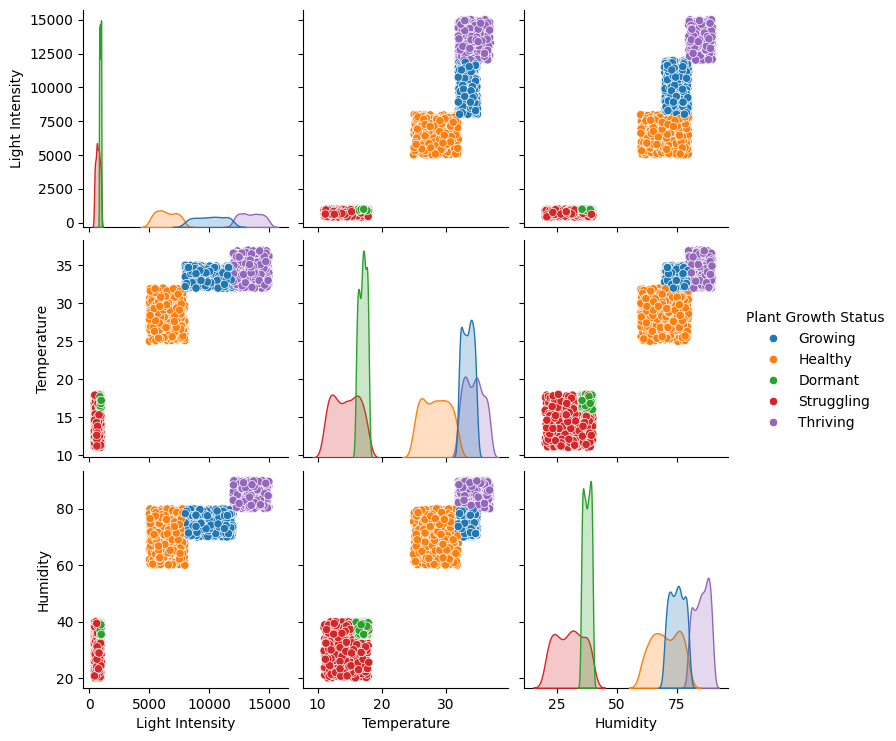

In [5]:
print("\nData visualization:")
sns.pairplot(df, hue='Plant Growth Status', diag_kind='kde')
plt.show()

<ipython-input-6-38bcb339a1a2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


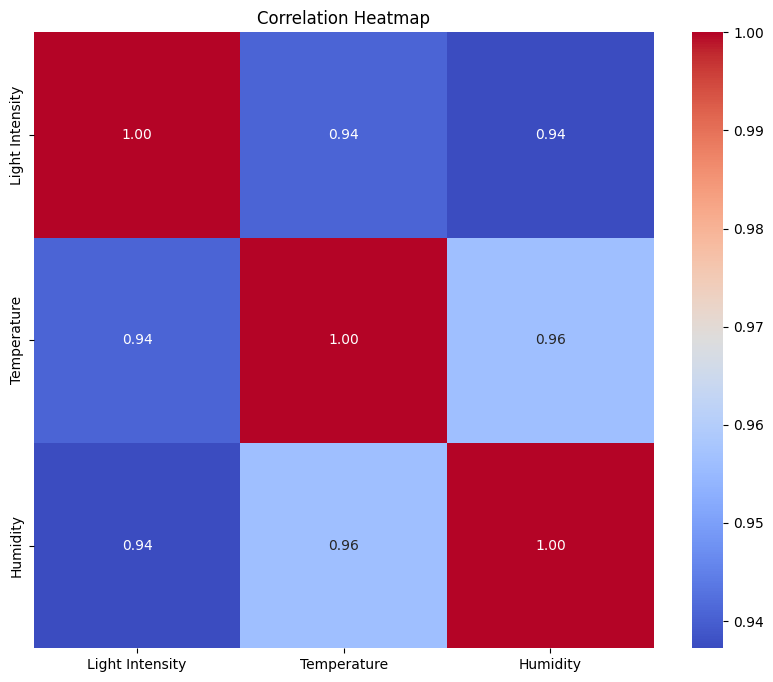

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

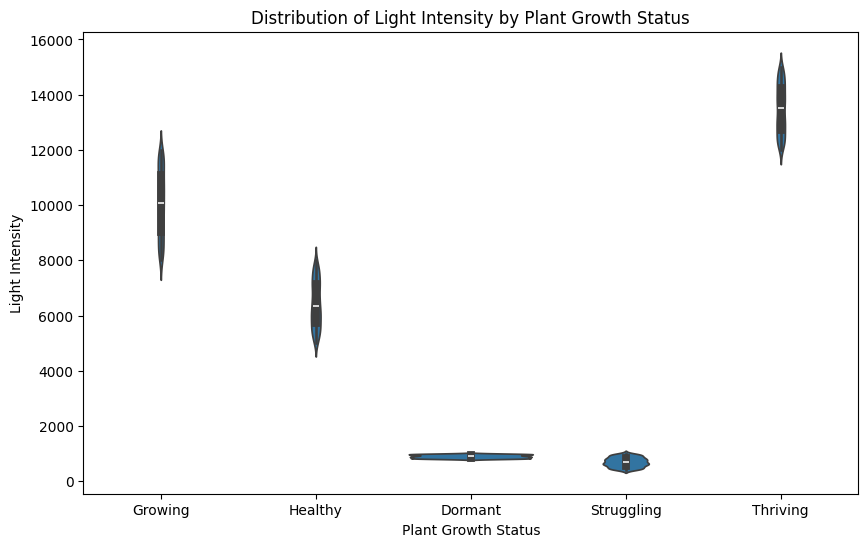

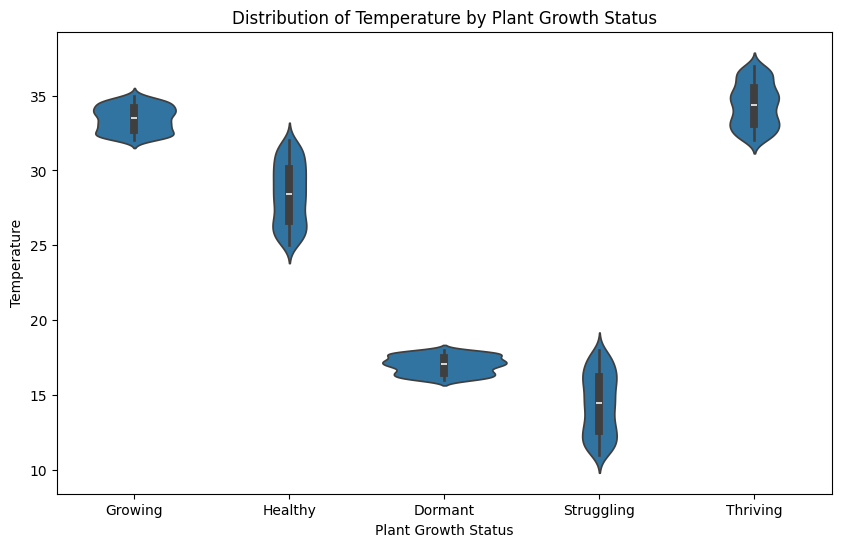

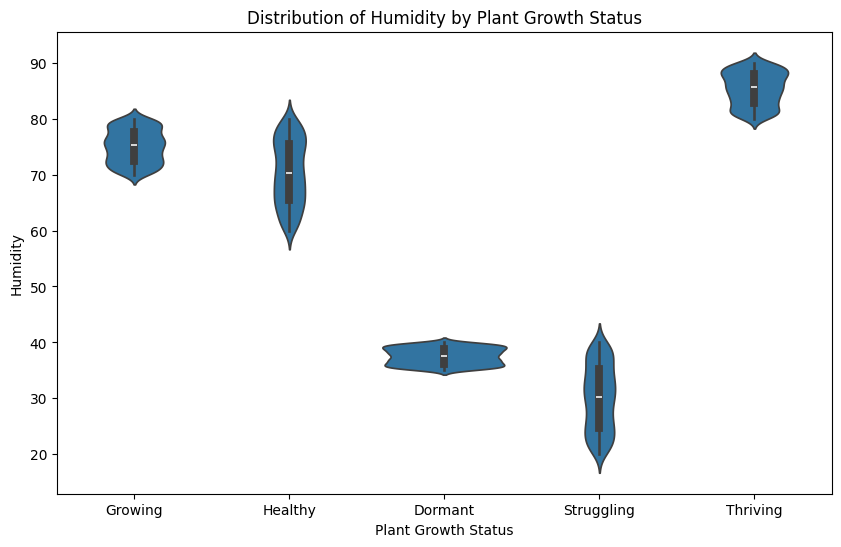

In [7]:
# Distribution of each feature by target class
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Plant Growth Status', y=column, data=df)
    plt.title(f"Distribution of {column} by Plant Growth Status")
    plt.show()



> **Spliting the dataset into training and testing sets**



In [8]:
X = df.drop(columns=['Plant Growth Status'])
y = df['Plant Growth Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


> **Training multiple machine learning models**

In [9]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "model": model,
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }


> **Evaluating models**

In [10]:
for name, result in results.items():
    print(f"\n{name} model evaluation:")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])


Random Forest model evaluation:
Accuracy: 0.9954337899543378
Classification Report:
              precision    recall  f1-score   support

     Dormant       0.98      1.00      0.99        82
     Growing       1.00      1.00      1.00        90
     Healthy       1.00      1.00      1.00        87
  Struggling       1.00      0.98      0.99        96
    Thriving       1.00      1.00      1.00        83

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438


Gradient Boosting model evaluation:
Accuracy: 0.9885844748858448
Classification Report:
              precision    recall  f1-score   support

     Dormant       0.96      1.00      0.98        82
     Growing       0.99      0.99      0.99        90
     Healthy       1.00      0.99      0.99        87
  Struggling       1.00      0.97      0.98        96
    Thriving       0.99      1.00      0.99        83

    accurac

> **Picking the best model**

In [11]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")


Best model: Random Forest


> **Dumping the best model in joblib format**

In [13]:
joblib.dump(best_model, 'plant_growth_model.joblib')
print("Best model saved as 'plant_growth_model.joblib'")

Best model saved as 'plant_growth_model.joblib'
